In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!nvidia-smi

Fri Jun 25 17:20:16 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.27       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   44C    P0    28W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
# !pip install fastbook 
!mv kaggle.json /root/.kaggle/
!pip install --upgrade --force-reinstall --no-deps kaggle
!kaggle competitions download -c state-farm-distracted-driver-detection

# !wget https://storage.googleapis.com/kaggle-competitions-data/kaggle-v2/5048/868335/bundle/archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1624881662&Signature=GKJnVg0%2BTaVCNYeNNJuKd79kAY0b7SUfzOyQb8%2FlwI9ZpdVodOy7KpAcbcbCFo7GdX9lI9uRrWQukDkqca3YyAtJyPEIBaz2QBEP5zFOrPdzsGLQda4e%2FdsHMZWA4NY1fl2rdV1Lof4pxHa92tBZaYgYlJvIKpxUaZXOybNWJwuKzGxD2jv5czQZJpAM%2FVs5UlPCZm4beTy4fpDdteOqtm%2B%2BNWkNz8mZ9er0dGDp9QipcG%2FL49mWEPFSZy3HDv9Wnr2GM5fi%2FbDgR43pVkJlpRqxoMwyP%2Fp12gXa4jSB%2BC7ESZMjnKd9cZz5rEpOzvIDw4mGUIZJH4fnOFstMUZkzA%3D%3D&response-content-disposition=attachment%3B+filename%3Dstate-farm-distracted-driver-detection.zip

mv: cannot stat 'kaggle.json': No such file or directory
Processing /root/.cache/pip/wheels/a1/6a/26/d30b7499ff85a4a4593377a87ecf55f7d08af42f0de9b60303/kaggle-1.5.12-cp37-none-any.whl
  Found existing installation: kaggle 1.5.12
    Uninstalling kaggle-1.5.12:
      Successfully uninstalled kaggle-1.5.12
state-farm-distracted-driver-detection.zip: Skipping, found more recently modified local copy (use --force to force download)


In [4]:
# !cp ./kaggle.json /root/.kaggle

In [5]:
!pip install fastbook

In [6]:
import pandas as pd 
import tensorflow as tf 
import numpy as np 
import matplotlib.pyplot as plt 
from fastai.vision.all import * 

In [7]:
!unzip /content/state-farm-distracted-driver-detection.zip

Streaming output truncated to the last 5000 lines.
  inflating: imgs/train/c7/img_56636.jpg  
  inflating: imgs/train/c7/img_56661.jpg  
  inflating: imgs/train/c7/img_56699.jpg  
  inflating: imgs/train/c7/img_56717.jpg  
  inflating: imgs/train/c7/img_56724.jpg  
  inflating: imgs/train/c7/img_56768.jpg  
  inflating: imgs/train/c7/img_56779.jpg  
  inflating: imgs/train/c7/img_56849.jpg  
  inflating: imgs/train/c7/img_56899.jpg  
  inflating: imgs/train/c7/img_56938.jpg  
  inflating: imgs/train/c7/img_5706.jpg  
  inflating: imgs/train/c7/img_57076.jpg  
  inflating: imgs/train/c7/img_57122.jpg  
  inflating: imgs/train/c7/img_57137.jpg  
  inflating: imgs/train/c7/img_5715.jpg  
  inflating: imgs/train/c7/img_57278.jpg  
  inflating: imgs/train/c7/img_57321.jpg  
  inflating: imgs/train/c7/img_57345.jpg  
  inflating: imgs/train/c7/img_57355.jpg  
  inflating: imgs/train/c7/img_5741.jpg  
  inflating: imgs/train/c7/img_57433.jpg  
  inflating: imgs/train/c7/img_5753.jpg  
  infla

In [8]:
all_data = pd.read_csv('./driver_imgs_list.csv')

In [ ]:
all_data.head()

,subject,classname,img
0,p002,c0,img_44733.jpg
1,p002,c0,img_72999.jpg
2,p002,c0,img_25094.jpg
3,p002,c0,img_69092.jpg
4,p002,c0,img_92629.jpg


In [ ]:
len(all_data)

22424

In [ ]:
all_data.value_counts('classname')

classname
c0    2489
c3    2346
c4    2326
c6    2325
c2    2317
c5    2312
c1    2267
c9    2129
c7    2002
c8    1911
dtype: int64

In [ ]:
submission = pd.read_csv('./sample_submission.csv')

In [ ]:
submission.head()

,img,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9
0,img_1.jpg,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1
1,img_10.jpg,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1
2,img_100.jpg,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1
3,img_1000.jpg,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1
4,img_100000.jpg,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1


In [ ]:
target = pd.get_dummies(all_data['classname'])

In [ ]:
train_data = all_data.img

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test, y_train,y_test = train_test_split(train_data, target)

In [ ]:
x_train.head()

372      img_98239.jpg
4848     img_59255.jpg
17977    img_17250.jpg
6962     img_76252.jpg
7361     img_78189.jpg
Name: img, dtype: object

In [ ]:
# plt.imread('../input/state-farm-distracted-driver-detection/imgs/train/' + x_train.to_numpy()[0])

In [ ]:
path = './state-farm-distracted-driver-detection/imgs/'

In [ ]:
lsit = pd.read_csv('./driver_imgs_list.csv')

In [ ]:
lsit.head()

,subject,classname,img
0,p002,c0,img_44733.jpg
1,p002,c0,img_72999.jpg
2,p002,c0,img_25094.jpg
3,p002,c0,img_69092.jpg
4,p002,c0,img_92629.jpg


In [ ]:
path = '/content/imgs/train'
fnames = get_image_files(path)
def label_func(x): return x.parent.name
dls = ImageDataLoaders.from_path_func(path, fnames, label_func)

In [ ]:
len(dls.train_ds.items),len(dls.valid_ds.items),dls.bs

(17940, 4484, 64)

In [ ]:
learner = cnn_learner(dls, resnet34,loss_func=CrossEntropyLossFlat(),metrics = accuracy).to_fp16()

In [ ]:
# learner.fit_one_cycle(1)
model= LoadLearner('/content/imgs/train/export.pkl')

NameError: ignored

In [ ]:
learner.export(fname ='/model.pkl')

In [ ]:
learner.save(file = './model')

Path('/content/imgs/train/models/model.pth')

In [ ]:
model = load_learner('/content/imgs/train/export.pkl')

In [ ]:
!cp '/content/imgs/train/export.pkl' /content/drive/Shareddrives/Tabata/fastai

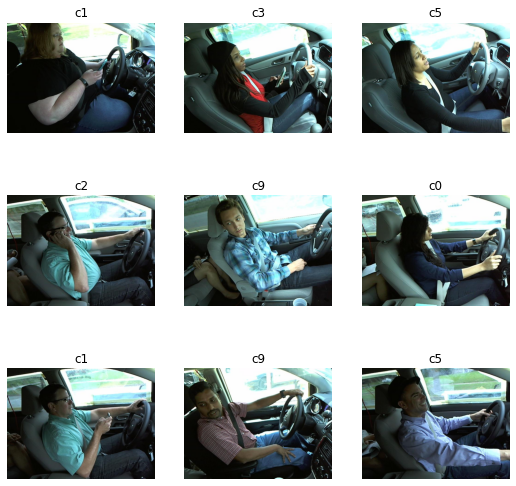

In [ ]:
dls.show_batch()

error: ignored

In [ ]:
from fastai import *

In [ ]:
nump_test_data = np.array(test_data.items)

In [ ]:
dls.test_dl(fnames)

Could not do one pass in your dataloader, there is something wrong in it


In [ ]:
tls = DataLoader(dls.test_dl(fnames))


Could not do one pass in your dataloader, there is something wrong in it


In [ ]:
test_data = dls.test_dl(test_list)

AssertionError: ignored

In [ ]:
dls = tls.dataloaders(bs = 32)

Could not do one pass in your dataloader, there is something wrong in it


AssertionError: ignored

In [ ]:
predictions = model.predict(nump_test_data,)

TypeError: ignored

In [ ]:
path = './imgs/test'
fnames = get_image_files(path)
# def label_func(x): return x.parent.name
fnames

(#79726) [Path('imgs/test/img_34584.jpg'),Path('imgs/test/img_59063.jpg'),Path('imgs/test/img_31042.jpg'),Path('imgs/test/img_21547.jpg'),Path('imgs/test/img_65208.jpg'),Path('imgs/test/img_71871.jpg'),Path('imgs/test/img_99654.jpg'),Path('imgs/test/img_15768.jpg'),Path('imgs/test/img_57946.jpg'),Path('imgs/test/img_17350.jpg')...]

In [ ]:
test_list = [] 
for  path in submission.img.to_numpy():
    test_list.append(str('.imgs/test/' + path))

In [ ]:
# test_images = get_image_files('../input/state-farm-distracted-driver-detection/imgs/test/')
test_list[0]

'../input/state-farm-distracted-driver-detection/imgs/test/img_1.jpg'

In [ ]:
print('hello')

hello


In [ ]:
print('hello')

In [ ]:
test_set = DataBlock(
    blocks = (ImageBlock),
    get_items = get_image_files,
    splitter = None
    # splitter = RandomSplitter(valid_pct = 0.2 , seed = 42),
    # item_tfms = Resize(128)
)

In [ ]:
test_data = test_set.dataloaders('/content/imgs/test/',verbose = True,bs = 2)

Found 79726 items
2 datasets of sizes 63781,15945
Setting up Pipeline: PILBase.create
Setting up after_item: Pipeline: ToTensor
Setting up before_batch: Pipeline: 
Setting up after_batch: Pipeline: IntToFloatTensor -- {'div': 255.0, 'div_mask': 1}


In [ ]:
# # test_data.show_batch() 
# x, y = test_data 

In [ ]:
# len(x.items),len(y.items)

(63781, 15945)

In [ ]:
# test_data.tensored()

AttributeError: ignored